# In this part we aim at removing a hidden bias in the data. Namely, the higher the floor area, the higher the resale price. This is an inherent bias that might affect conclusions.

In [1]:
import seaborn as sns

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import os, sys



In [2]:
path_to_data_mine = '../../data_mine/'
#file_name = 'resale-flat-prices-based-on-approval-date-1990-1999.csv'
#file_name = 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
#file_name  = 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
file_name = 'resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv'



path_to_file = path_to_data_mine + file_name

df = pd.read_csv(path_to_file, encoding='utf-8')


df . head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


# A function to compute Pearsron correlation coefficient for each plot, defined as

$\rho = \frac{\left< x y \right>  - \left< y \right>\left< y \right>}{\sqrt{\left( \left< x^2 \right> - \left< x \right>^2 \right) \left( \left< y^2 \right> - \left< y \right>^2 \right) }}$ 


In [3]:
###########################
#                         #
#                         #
#       Correlation       #
#                         #
#                         #
###########################


# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
	
	# Calculate the value
	coef = np.corrcoef(x, y)[0][1]
	
	# Make the label
	
	label = r'$\rho$ = ' + str(round(coef, 2))
    
   # Add the label to the plot
   
	ax = plt.gca()
	ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


# Divide the resale price by the floor area to get the price per sqr.
## transform to log-scale, in order to prevent a right-skewed distribution

In [4]:
df['log_resale_price_per_sqrm'] = np . log10 ( df['resale_price'] / df['floor_area_sqm'] )


In [5]:
df = df . drop ( 'resale_price', 1 ) # 1 : column
df = df . drop ( 'floor_area_sqm', 1 ) # 1 : column


/home/rahbari/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


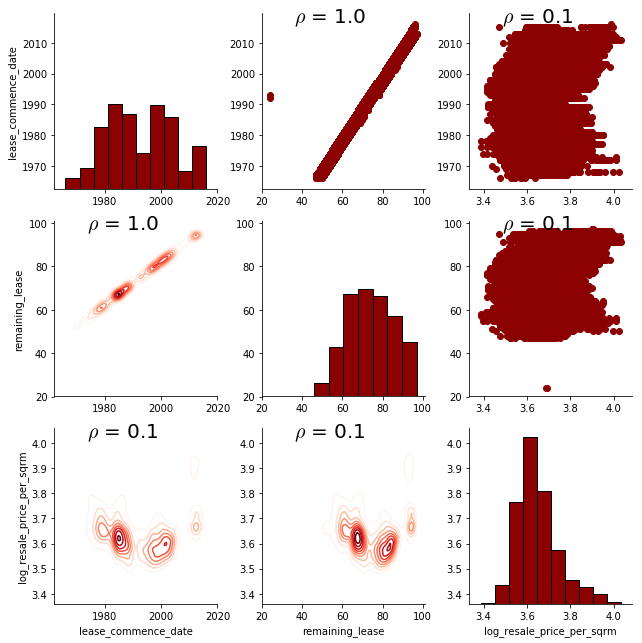

In [6]:
grid = sns.PairGrid(df, size = 3)


grid.map_upper(plt.scatter, color = 'darkred')


grid.map_upper(corr)


grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')

grid.map_lower( sns.kdeplot, cmap = 'Reds' )

x = grid.map_lower(corr)


plt . show()


# The resale price distribution becomes wider when divided by the floor area. To decide whether to consider total resale price or resale price per sqm in the next section in modeling, one requires to do a research in the market to gain more insights about how the decisions are made in the housing market. We leave this open for further research.